In [2]:
from sklearn.metrics import roc_curve, auc

In [3]:
# imports
import pandas as pd

In [4]:
import matplotlib as mpl

In [5]:
import matplotlib.pyplot as plt
import random

We look at the following ideas in the discussion below:
1. Linear Regression - with least squares
2. Metrics for measuring the goodness of a regression model
3. Classifier's performance metrics
4. Methods for deciding whih classifier to choose 

--------------------------------------------------

We read a dataset to illustrate the idea of evaluating linear regression results.

In [6]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

from sklearn import datasets
boston1 = datasets.load_boston()
boston1.data.shape

(506, 13)

In [7]:
fn=boston1.feature_names

In [8]:
df_boston = pd.DataFrame(boston1.data, columns=fn)

In [9]:
df_boston['MEDV'] = boston1.target

In [10]:
df_boston.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
5     18.7  394.12   5.21  28.7  
6     15.2  395.60  12.43  22.9  
7     15.2  396.90  19.15  27.1  
8     15.2  386.63  29.93  16.5  
9     15.2  386.71  17.10  18.9

In [11]:
df_boston["MEDV"].mean()

22.532806324110698

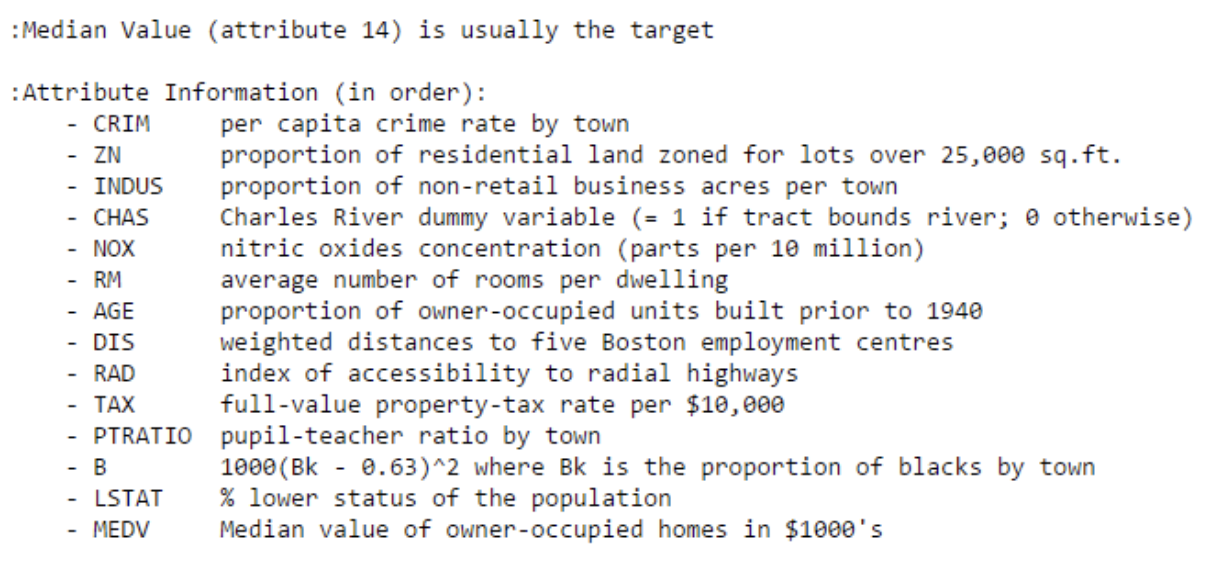

Let us now learn a regression model to predict the MEDV (Median Value) of a house based on some of the features.

In [12]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lmboston = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + TAX + PTRATIO + RAD', data=df_boston).fit()

# print the coefficients
lmboston.params

Intercept    57.923316
CRIM         -0.239209
ZN            0.037663
INDUS        -0.209982
TAX          -0.023544
PTRATIO      -1.484797
RAD           0.460112
dtype: float64

How do we interpret these parameters?

Let us include two more features, CHAS and DIS, for inducing the regression function and run it again.

In [13]:
# create a fitted model in one line
lmboston1 = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + TAX + PTRATIO + RAD + CHAS + DIS', data=df_boston).fit()

# print the coefficients
lmboston1.params

Intercept    57.928806
CRIM         -0.255497
ZN            0.091820
INDUS        -0.412231
TAX          -0.021324
PTRATIO      -1.151192
RAD           0.379177
CHAS          4.268059
DIS          -1.289918
dtype: float64

Note: Coefficient of INDUS has changed from -0.209 to -0.412; In the new model the value of the house is affected much more significantly by the INDUS attribute.

Let us add and drop features and run the regression again. We drop CRIM and ZN and add AGE and LSTAT

In [14]:
# create a fitted model in one line
lmboston1B = smf.ols(formula='MEDV ~ INDUS + TAX + PTRATIO + RAD + CHAS + DIS + AGE + LSTAT', data=df_boston).fit()

# print the coefficients
lmboston1B.params

Intercept    61.442420
INDUS        -0.163419
TAX          -0.012855
PTRATIO      -1.091357
RAD           0.251397
CHAS          3.134645
DIS          -0.962599
AGE           0.002780
LSTAT        -0.857904
dtype: float64

Coefficient of INDUS changes from -0.41 to -0.16.

Changing the set of features included in the model makes significant changes to the model

In [15]:
print(lmboston.aic)
print(lmboston.rsquared)
print(lmboston.pvalues)

3427.630394060717
0.40984556528539073
Intercept    1.774030e-55
CRIM         5.290354e-07
ZN           2.793035e-02
INDUS        7.592602e-03
TAX          2.538595e-05
PTRATIO      1.328064e-16
RAD          1.996858e-06
dtype: float64


Let us try another combination of input features. We do not know apriori which features, or subsets of features, are good predictors. Some of the features may be just noise. 

In [16]:
# create a fitted model in one line
lmboston1C = smf.ols(formula='MEDV ~ PTRATIO + RAD + DIS + AGE + LSTAT', data=df_boston).fit()

# print the coefficients
lmboston1C.params

Intercept    59.268867
PTRATIO      -1.216285
RAD           0.025137
DIS          -0.719354
AGE           0.000009
LSTAT        -0.932547
dtype: float64

Coefficient for RAD has changed from 0.25 to 0.025. This is significant change.

How do we know when we have a good model with good coefficients for the features? Also, when do we have a model that is the best explanation for the data? 

------------------------------------------  


The intuitive criteria for a good model are: 

The model should "explain" the data as much as possible. 

The mdoel should involve as few features as possible. Including more features in themodel has the danger of the model overfitting the data (and modeling the noise present in the data).

*********************
***********************
*************************


What do we mean by saying that a model should explain the data?

The discrpency between the observed values (of the target) in the data and the predicted target values by the models must be as small as possible.

How do we measure the discrepency between the two values of the target?

If the "error" is: Absolute_value |observed_value - predicted_value|, then 

One possible metric for Good(bad)ness of fit between the data and the model is: Sum of Squares of errors for all the observed data points 

$SSE = \forall_{oberved-data-points}(V_{Observed} - V_{Predicted})^{2}$

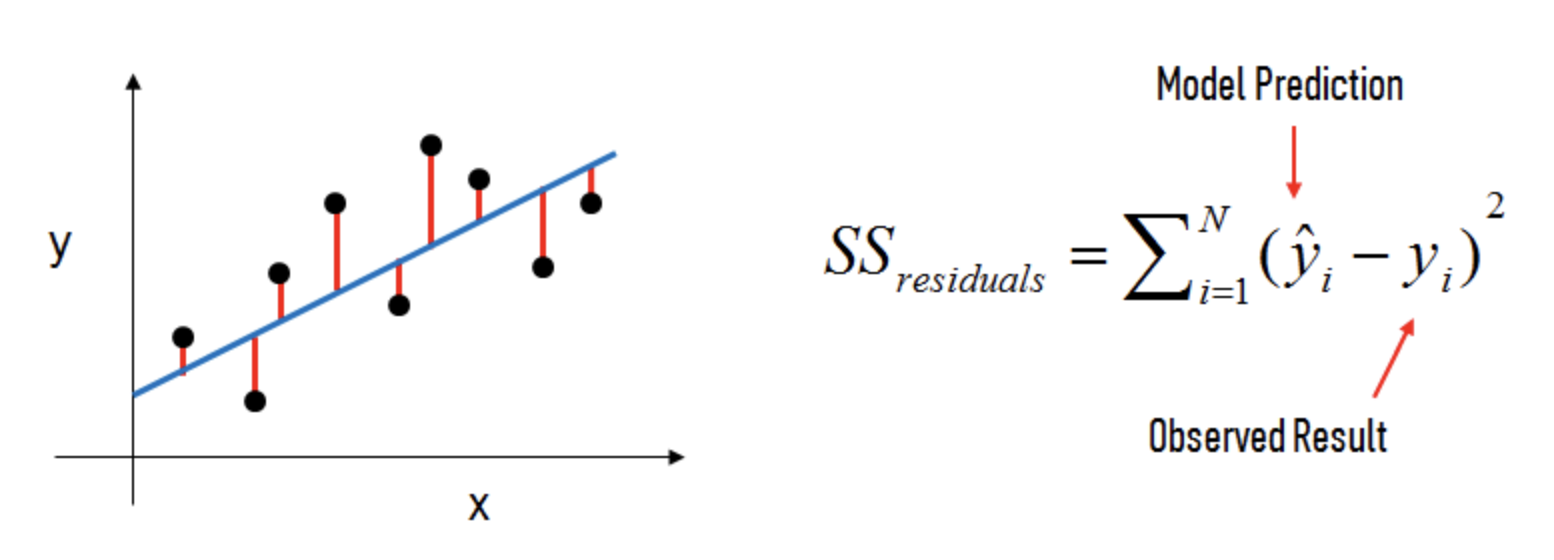

--------------------------
---
---
---

A very very simple "baseline" model for the data is: Let the predicted value be the average of the observed Traget Values. 

Our model should do better than this baseline model.

How much better is the regression model compared to this "baseline" model?

This is measured by the metric called:  $R^{2}$

------------

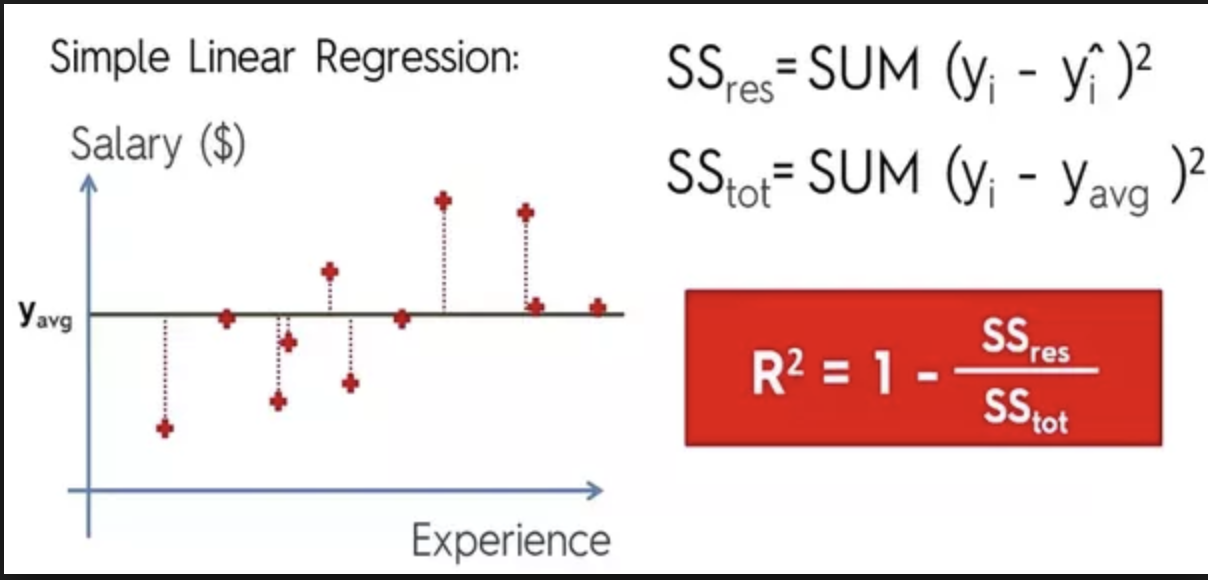

So, the quantity $R^2$ denotes the extent to which the model improves the explanation of the data when compared to the baseline model.



Let us see the $R^{2}$ values for the models that we have learned above.

In [17]:
print(lmboston.rsquared)
print(lmboston1.rsquared)
print(lmboston1B.rsquared)
print(lmboston1C.rsquared)


0.40984556528539073
0.4553510160857531
0.657212348138213
0.6292483894087795


Let us try one more model for regression with this data with only two features.

In [18]:
# create a fitted model in one line
lmboston1D = smf.ols(formula='MEDV ~ AGE + LSTAT', data=df_boston).fit()

# print the coefficients
lmboston1D.params

Intercept    33.222761
AGE           0.034544
LSTAT        -1.032069
dtype: float64

In [19]:
lmboston1D.rsquared

0.5512689379421003

Model $lmboston1D$ with just two features performs much better than the models $lmboston$(6 features) and $lmboston1$(8 features).

The extra features, it seems, are adding noise and not information to the prediction model.

Models $lmboston1B$ and $lmboston1C$ have much higher $R^2$ (0.657 and 0.629) respectively. But is that really information? or is the model overfitting the data? How do we find out?

So we have a tradeoff criterion: We want the mdoel to exaplain as much data as possible with as few fgeatures as possible.

Some adjustments to the $R^2$

There are two problems with the $R^2$:

1. Every time you add a predictor to a regression model, the $R^2$ value increases, even if by chance alon. It never decreases.

2. If a model has too many predictors it starts overfitting the data.

The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

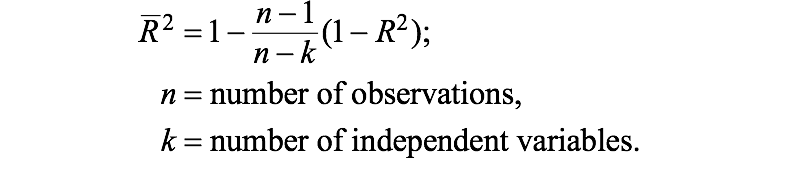

In [20]:
lmboston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     57.76
Date:                Tue, 06 Nov 2018   Prob (F-statistic):           3.84e-54
Time:                        21:23:15   Log-Likelihood:                -1706.8
No. Observations:                 506   AIC:                             3428.
Df Residuals:                     499   BIC:                             3457.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.9233      3.245     17.850      0.000      51.548      64.299
CRIM          -0.2392      0.047     -5.082      0.000      -0.332      -0.147
ZN             0.0377      0.017      2.205      0.028       0.004       0.071
INDUS         -0.2100      0.078     -2.681      0.008      -0.364      -0.056
TAX           -0.0235      0.006     -4.251      0.000      -0.034      -0.013
PTRATIO       -1.4848      0.173     -8.567      0.000      -1.825      -1.144
RAD            0.4601      0.096      4.811      0.000       0.272       0.648
==============================================================================
Omnibus:                      189.623   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.353
Skew:                           1.710   Prob(JB):                    3.06e-153
Kurtosis:                       7.649   Cond. No.                     4.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We use a criterion called Akaike's Information Criterion:

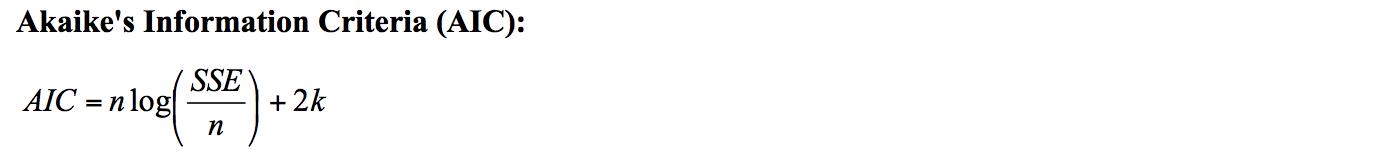

where:
 
    n is the number of training instances in data
    
    and k is the number of variables included in the model
    
    We want the erroro to be as small as possible and the number of variables also to be as small as possible.
    
    So, we want to prefer a model that has the smallest possible value of AIC metric.

--------

Let us now check the AIC criterion for all the models that we have learned so far.

-----

In [21]:
print(lmboston.aic)
print(lmboston1.aic)
print(lmboston1B.aic)
print(lmboston1C.aic)
print(lmboston1D.aic)

3427.630394060717
3391.027569922666
3156.734209643488
3190.4153168483945
3281.0063714304697


So, given the AIC criterion, we should pick the $lmboston1B$ model because it has the smallest AIC value.

Model lmboston1B has 8 features and lmboston1C has 6 features

Let us say in the expression for AIC if we replace the term $2k$ by $52k$. That will result the AIC for lmboston1B to become 3556 and AIC for lmboston1C to become 3490. Now we will prefer lmbostoniC instead of lmboston1B.

So, if this multiplier becomes larger, it has the effect of preferring models that have fewer variables. It is because it is becoming more expensive to include an extra variable in the mdoel.

The multiplier for the 'number of variables in the mdoel' affects the trade-off between the fitness of the model as measured by $R^2$ and the complexity of the model as measured by the number of variables in the model.

There is another criterion commonly used for comparisopn of regression models, called $SBIC$.

----
----



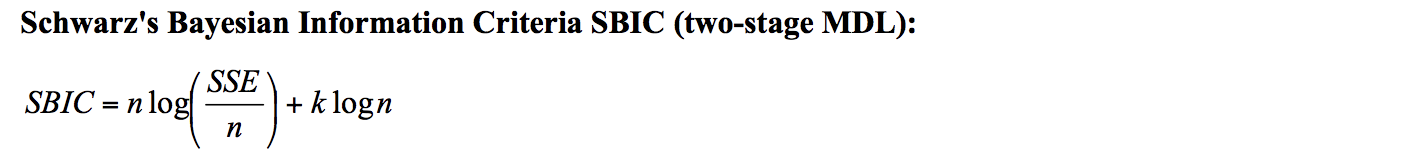

Notice here that the multiplier for $k$ is Log(n) where n is the number of data points used for training. 

So, if we use SBIC criterion, the preferred model will be the one with fewer and fewer variables as the number of training instances increases. 

Intuitive?

If we have more training examples, we get a model with fewer variables, and

If we have fewer training examples, we get a model with more variables.

----------
----------


There is another commonly used criterion for comparing regression models. It is called "Bayesian Information Criterion" It looks very similar to AIC but is derived very differently. It is trying to find the model that maximizes the poetrior probebaility of the model given the data.

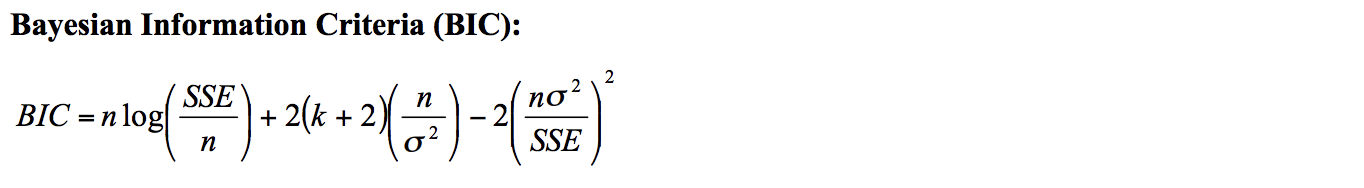


Here $\sigma^2$ is the variance of the regression model that includes all the available variables in the dataset.

It has three sum terms. The first is the same as in AIC and SBIC. The second and third are more complex are more grounded in statistical and information theoretic criteria.

We still prefer the model with the lowest value for the BIC criterion.

sklearn library computes the BIC criterion for the regression models. 

For the five models that we have crerated the BIC values are:

------
-------


In [22]:
print(lmboston.bic)
print(lmboston1.bic)
print(lmboston1B.bic)
print(lmboston1C.bic)
print(lmboston1D.bic)

3457.2161507457295
3429.066399946253
3194.7730396670754
3215.7745368641195
3293.685981438332


So, according to the BIC criterion also we will pick the lmboston1B model.

How do I search for the best regression Model?
---


A simple and greedy, not necessarily globally optimal, strategy is as follows.

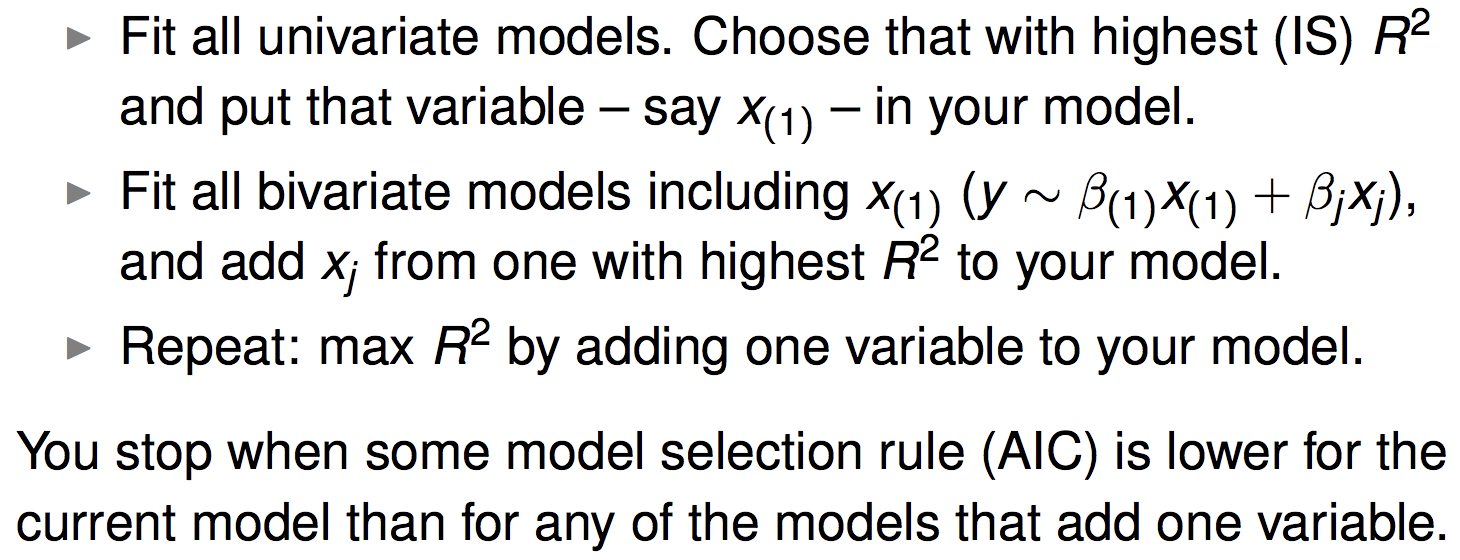

----------

Backward Deletion Method:
---

We can also have a bacjward deletion method for model. Start with a model containing all the features as predictors. Drop the least promising predictors in each iteration.

More extensive search:
---

- Mix the steps for addition and deletion of the most/least promising features

Another criterion used is the p-values of the coefficients for the variables in the regression model. p=value tells how muct to truct the model compared to a null-hypothesis (that is, there is no model for this data). Let us look at the p-values for the models that we have generated.

In [23]:
lmboston.pvalues

Intercept    1.774030e-55
CRIM         5.290354e-07
ZN           2.793035e-02
INDUS        7.592602e-03
TAX          2.538595e-05
PTRATIO      1.328064e-16
RAD          1.996858e-06
dtype: float64

In [24]:
lmboston1B.pvalues

Intercept    3.096854e-78
INDUS        1.428656e-02
TAX          2.200697e-03
PTRATIO      6.870988e-16
RAD          4.277961e-04
CHAS         1.497586e-03
DIS          1.350849e-06
AGE          8.449544e-01
LSTAT        2.834210e-57
dtype: float64

In [25]:
lmboston1C.pvalues

Intercept    6.598620e-76
PTRATIO      1.834402e-18
RAD          5.008753e-01
DIS          1.228471e-04
AGE          9.994982e-01
LSTAT        2.662902e-65
dtype: float64

In [26]:
lmboston1D.pvalues

Intercept    2.943785e-180
AGE           4.906776e-03
LSTAT         8.419554e-73
dtype: float64

Which regression Model to select?
---

We need to use AIC and BIC to compare models for their fit to the data. 

Do we not need to use $R^2$ and p-values in the model selection process?

We need to look at both of them.

We need models with low p-values.

Lower AIC value for a model among candidates, when it has high p-values shows that all the models are bad. Selecting the lowest AIC from among all the bad models is not a good choice. AIC and BIC only have a comparative insight, but not an absolute goodness insight.



Regularization
---



Another overfitting avoidance step frequently done with regression models is $ Regularization.$

What is Regularization?

A Regression model learnt by minimizing the least squares error (OLS function in sklearn) may have high variance.

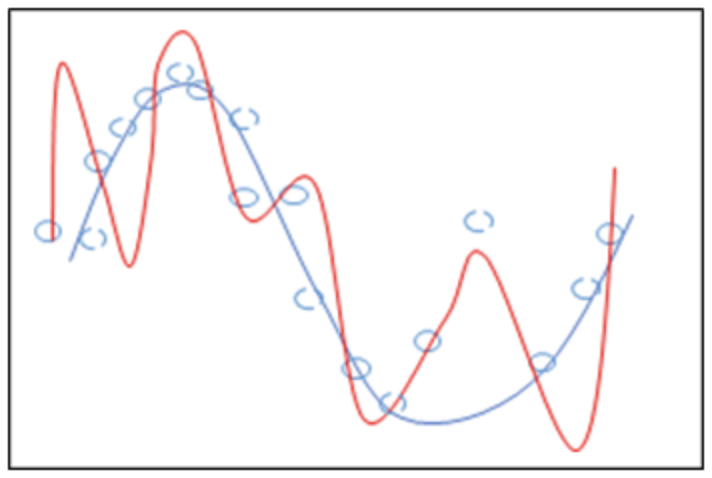

Here both curves may have the same least squares value. 

That is, due to overfitting the learned model will not generalize very well for a dataset different from the training data. 

Regularization seeks to reduce the variance without signifciantly increasing the bias.

How is regularization done?

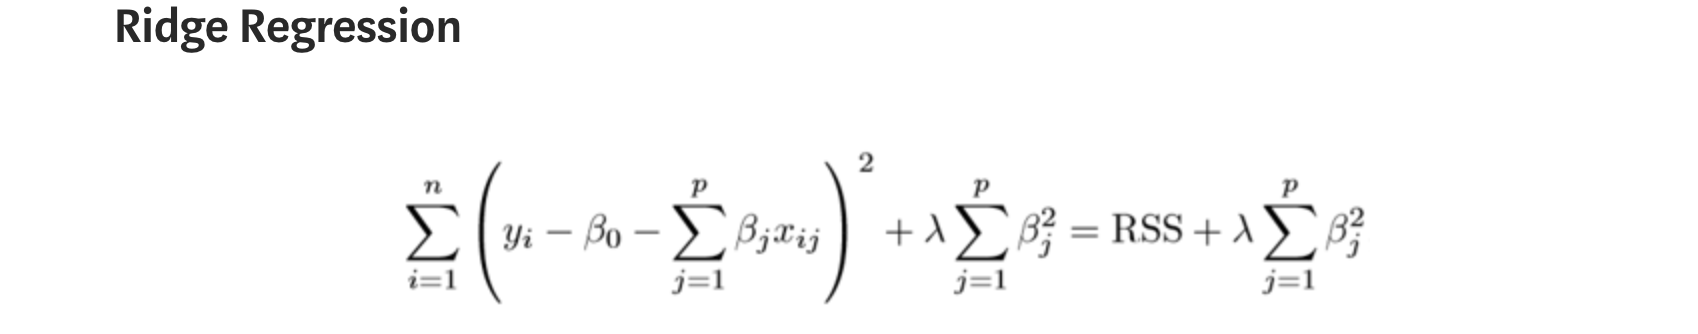

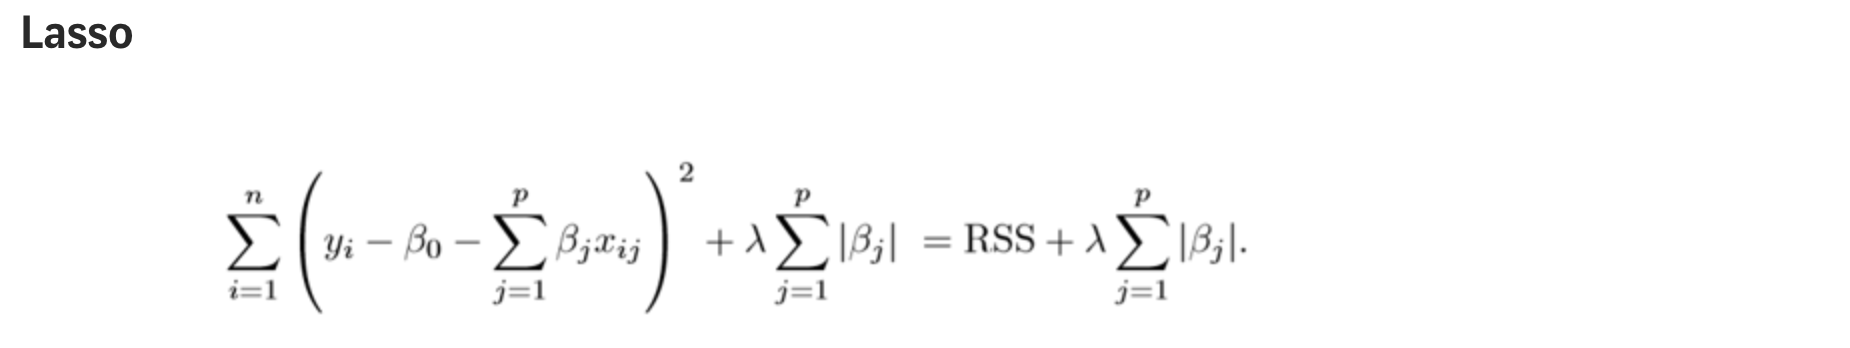

The coefficients thus obtained reduce the effects of overfitting and resultant variance.

Practice Data and Problems:
---


In [27]:
diabetes1 = datasets.load_diabetes()
diabetes1.data.shape

(442, 10)

In [28]:
fnd=diabetes1.feature_names
df_diabetes = pd.DataFrame(diabetes1.data, columns=fnd)
df_diabetes['PROGRESS'] = diabetes1.target
df_diabetes.head(10)

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066630  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  PROGRESS  
0 -0.002592  0.019908 -0.017646     151.0  
1 -0.039493 -0.068330 -0.092204      75.0  
2 -0.002592  0.002864 -0.025930     141.0  
3  0.034309  0.022692 -0.009362     206.0  
4 -0.002592 -0.031991 -0.046641     135.0  
5 -0.076395 -0.041180 -0.096346      97.0  
6 -0.039493 -0.062913 -0.038357     138.0  
7  0.017703 -0.035817  0.003064      63.0  
8 -0.002592 -0.014956  0.011349     110.0  
9 -0.002592  0.067736 -0.013504     310.0

In-Class Exercise #1
-----

Use the Diabetes dataset loaded above, perform the following tasks in class:

1. Find the individual feature that results in the highest amount of $R^2$ value.
2. Try a few combinations of three features as input and see which triplet results in the best model according to the AIC criterion. How are the p-values and $R^2$ for this model compared to other models (with higher AIC values) that you try.

* * * * * * * * * * * * * * * * * * * * * * * * * * * * *


CLASIFICATION: 
---


LOGISTIC REGRESSION, NEURAL NETWORKS, DECISION TREES, ETC.


* * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Despite its name, logistic regression can actually be used as a model for classification. It uses a logistic function (or sigmoid) to convert any real-valued input x into a predicted output value ŷ  that take values between 0 and 1, as shown in the following figure:

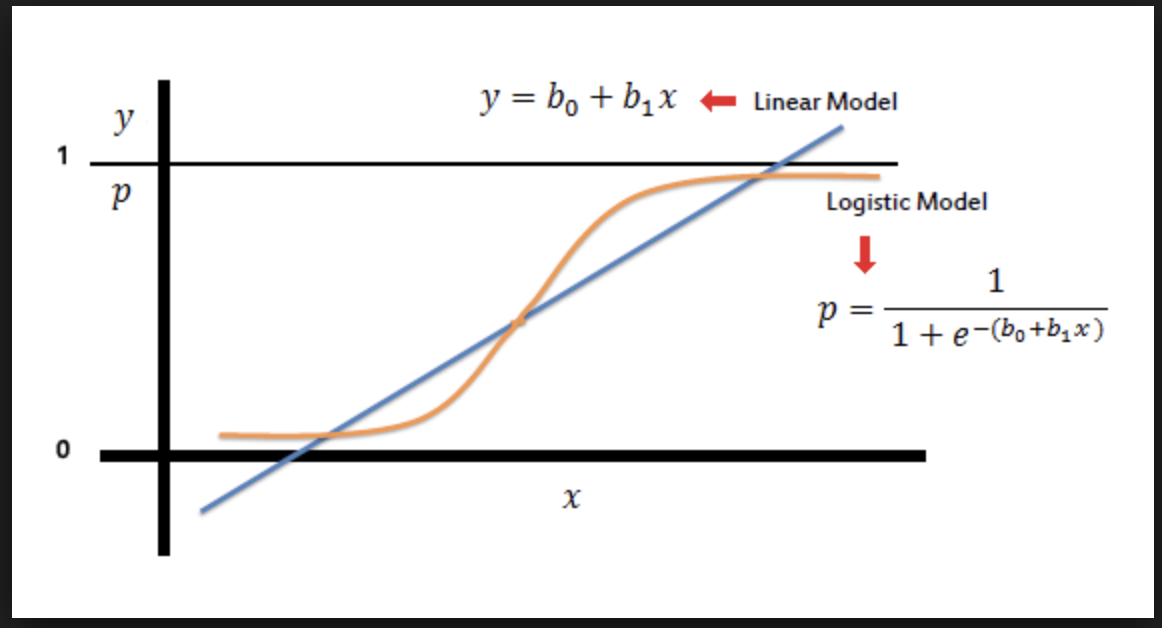

Rounding ŷ  to the nearest integer effectively classifies the input as belonging either to class 0 or 1.

Of course, most often, our problems have more than one input or feature value, x. For example, the Iris dataset provides a total of four features. For the sake of simplicity, let’s focus here on the first two features, sepal length—which we will call feature f1—and sepal width—which we will call f2. Using the tricks we learned when talking about linear regression, we know we can express the input x as a linear combination of the two features, f1 and f2:

x=w1f1+w2f2

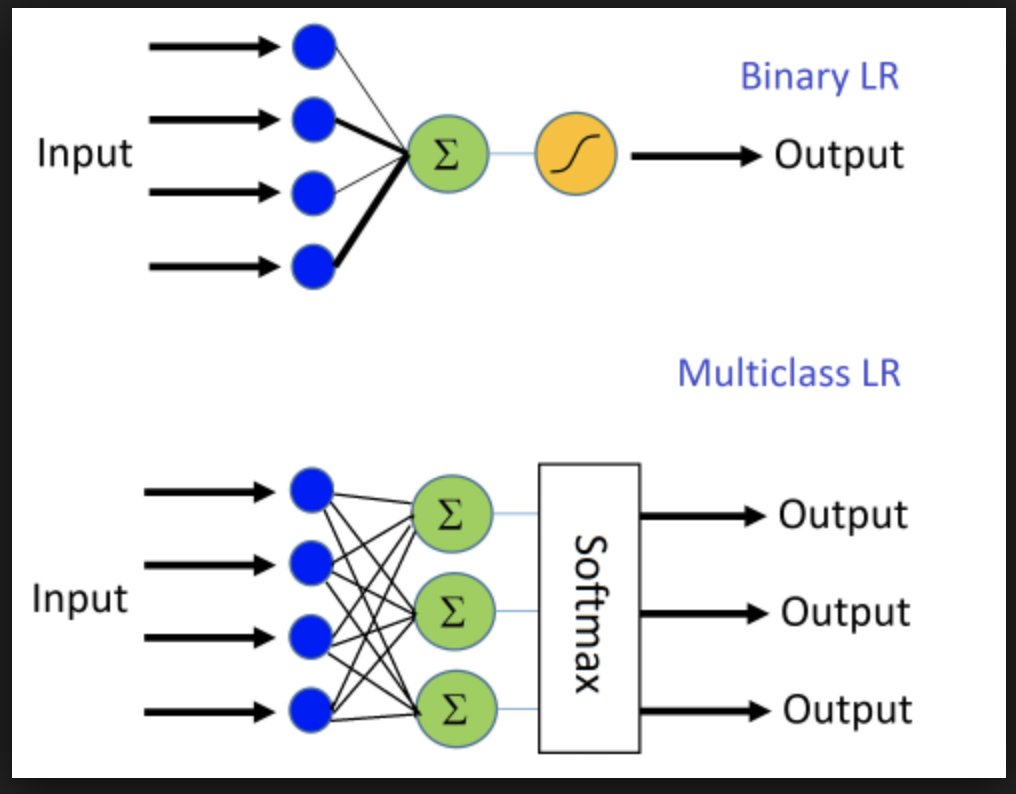

However, in contrast to linear regression, we are not done yet. From the previous section, we know that the sum of products would result in a real-valued, output—but we are interested in a categorical value, zero or one. This is where the logistic function comes in: it acts as a squashing function, σ, that compresses the range of possible output values to the range [0, 1]:

ŷ =σ(x)
Because the output is always between 0 and 1, it can be interpreted as a probability. If we only have a single input variable x, the output value ŷ  can be interpreted as the probability of x belonging to class 1.

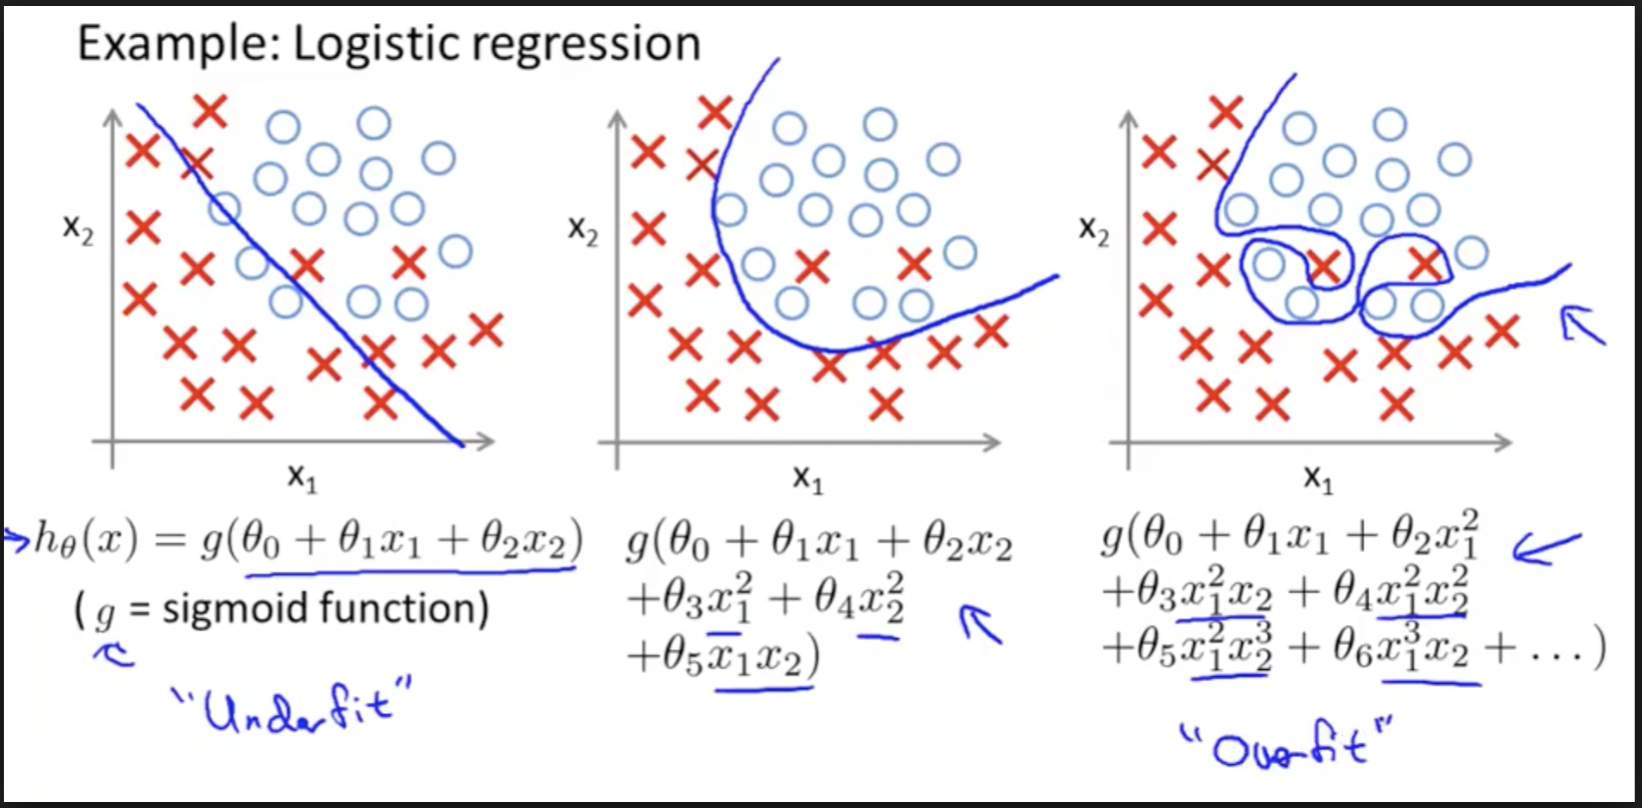


DECISION TREE
-------------------

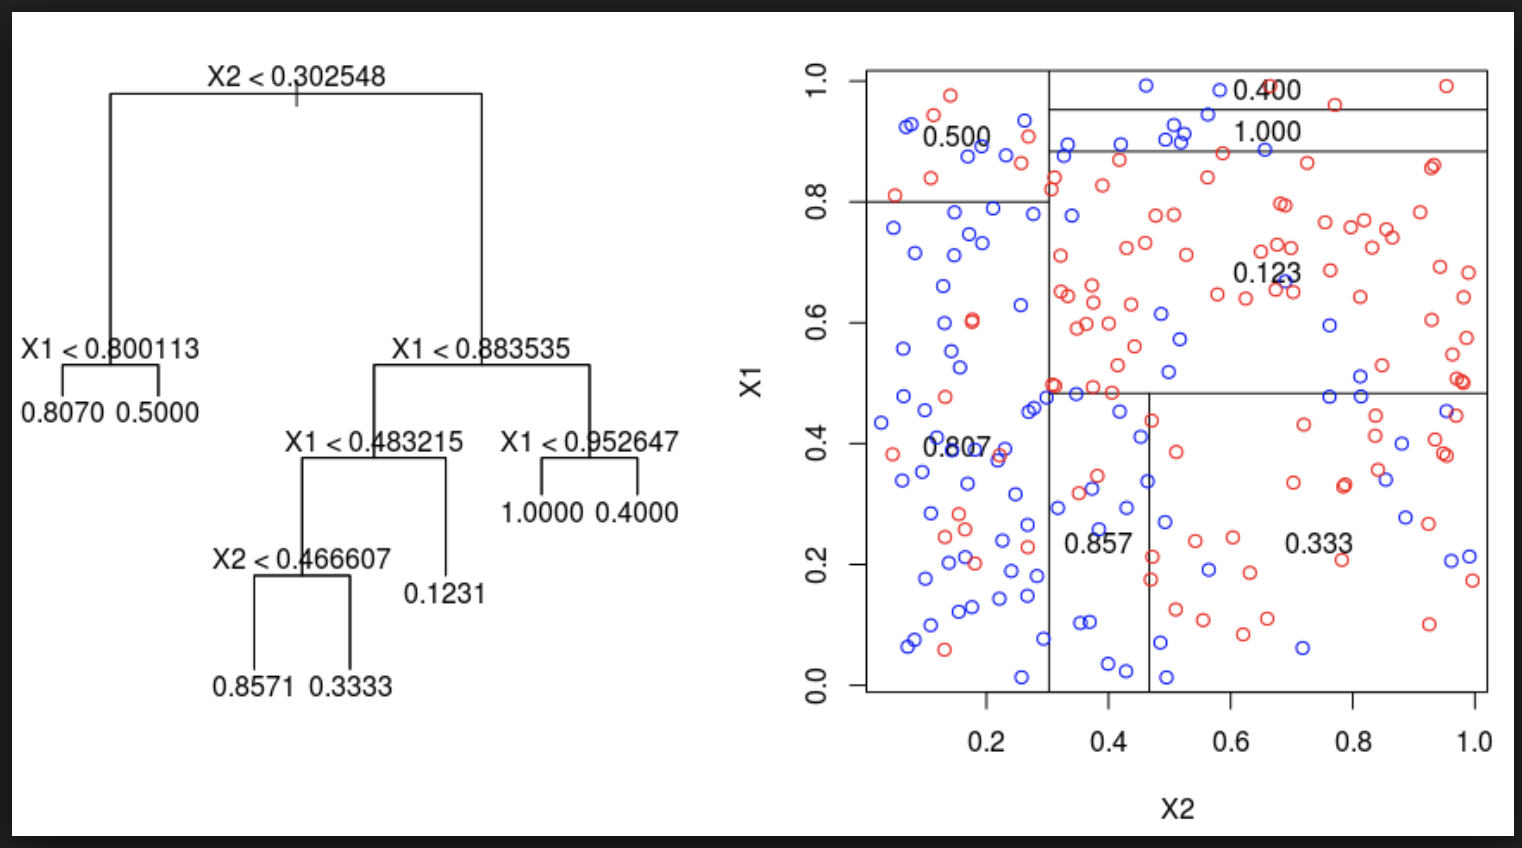



Now let’s examine classification models using a Breast-Cancer dataset!
--


In [29]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [30]:
cancer['data'].shape

(569, 30)

In [31]:
X = cancer['data']
y = cancer['target']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=54)

In [33]:
X_train.shape

(341, 30)

In [34]:
X_train[0:2,:]

array([[1.377e+01, 2.229e+01, 9.063e+01, 5.889e+02, 1.200e-01, 1.267e-01,
        1.385e-01, 6.526e-02, 1.834e-01, 6.877e-02, 6.191e-01, 2.112e+00,
        4.906e+00, 4.970e+01, 1.380e-02, 3.348e-02, 4.665e-02, 2.060e-02,
        2.689e-02, 4.306e-03, 1.639e+01, 3.401e+01, 1.116e+02, 8.069e+02,
        1.737e-01, 3.122e-01, 3.809e-01, 1.673e-01, 3.080e-01, 9.333e-02],
       [1.616e+01, 2.154e+01, 1.062e+02, 8.098e+02, 1.008e-01, 1.284e-01,
        1.043e-01, 5.613e-02, 2.160e-01, 5.891e-02, 4.332e-01, 1.265e+00,
        2.844e+00, 4.368e+01, 4.877e-03, 1.952e-02, 2.219e-02, 9.231e-03,
        1.535e-02, 2.373e-03, 1.947e+01, 3.168e+01, 1.297e+02, 1.175e+03,
        1.395e-01, 3.055e-01, 2.992e-01, 1.312e-01, 3.480e-01, 7.619e-02]])

Standardize the Data
---

All features must be standardized before use in a classifier.

We use StandardScaler preprocessing to all attributes.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.



In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

---------------------------


Now train using Multi-layer network.
---


------------------------

In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(2))

mlp.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [37]:
predictions = mlp.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 87   6]
 [  1 134]]


CONFUSION MATRIX
-----

Helps compute performance characteristics for the classifier
-------------------

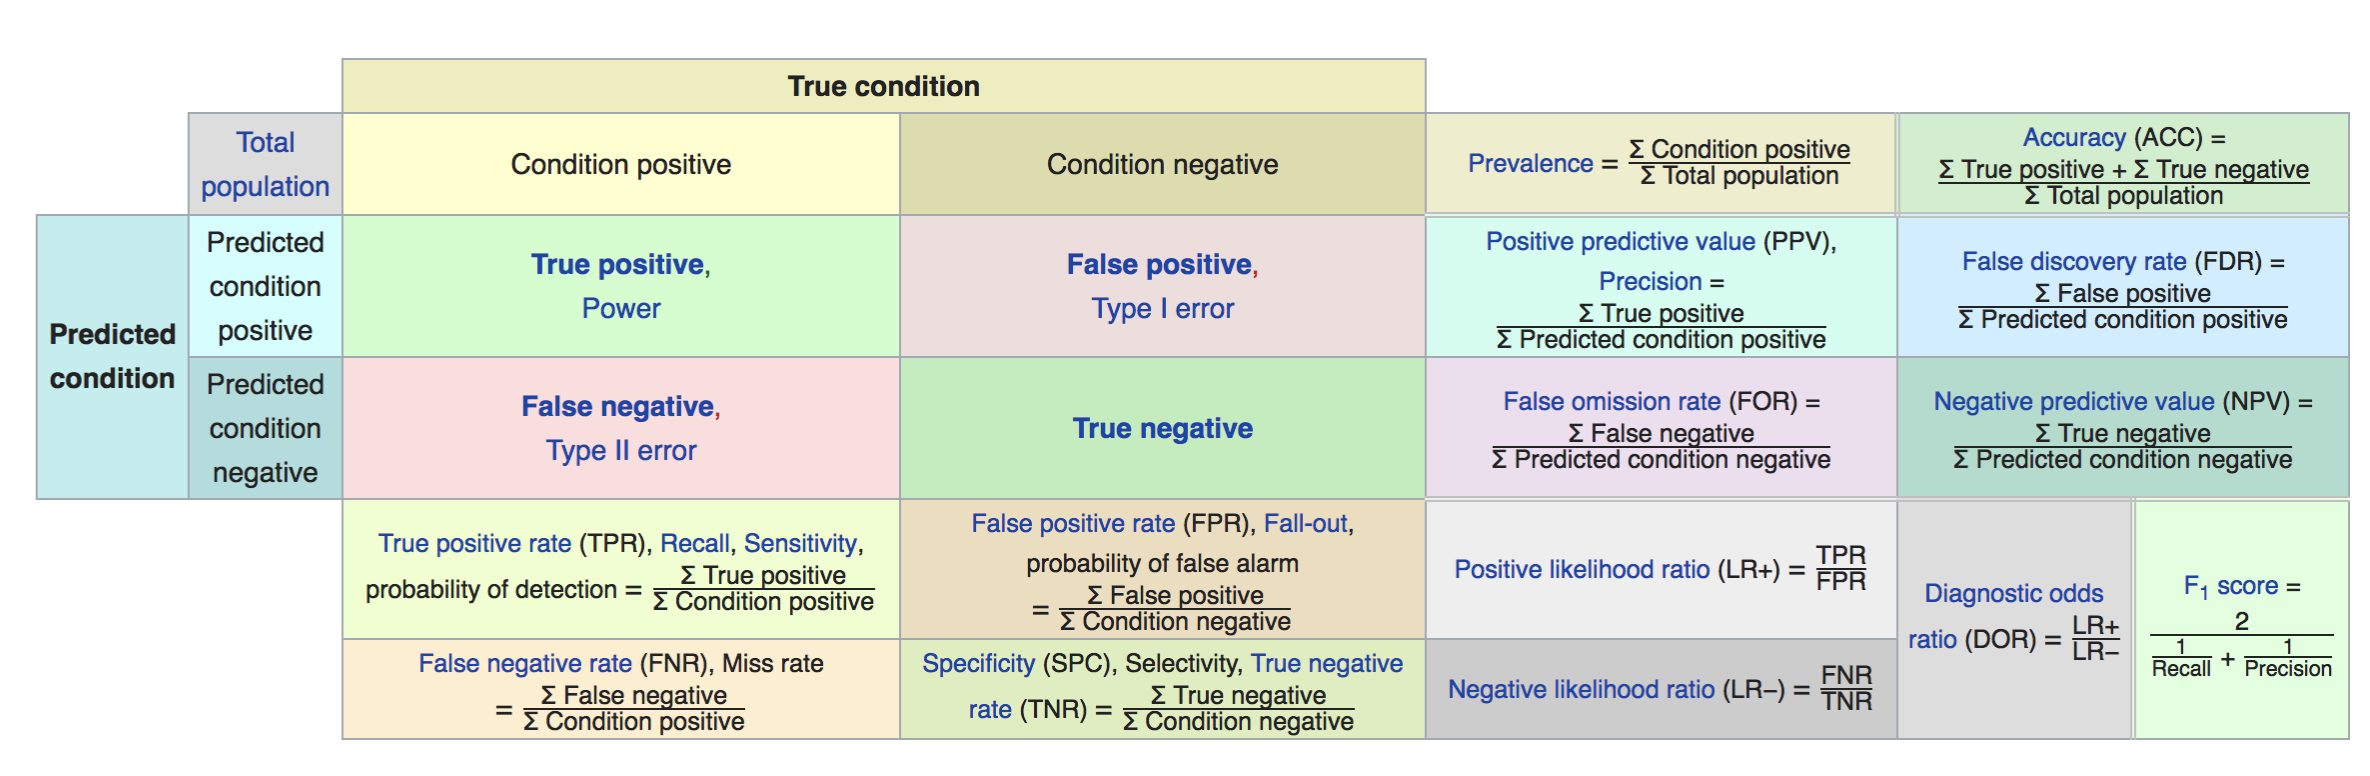

Confusion Matrix: (actual classes along rows; predicted classes along columns)

[[ 90    10    20

 [ 30 .  60 .  30]
 
 [ 05 .  05 .  90]]
 
 Accuracy: = (90+60+90)/340       = 70.5%
 
 Precision (class1): 90/(90+30+5) = 72%
 
 Precision (class2): 60/(10+60+5) = 80%
 
 Precision (class3): 90/(20+30+90)= 64.3%
 
 
 Recall (class1) = 90/(90+10+20)  = 75%
 
 Recall (class2) = 60/(30+60+30)  = 50%
 
 Recall (class3) = 90/(5+5+90)    = 90%
 
 
 
 
 Now, let us make the test set larger by assuming the size of class3 recognized as class3 to be 10 times in size.
 
 New confusion matrix is:
 
  
 [[ 90    10    20
 
  [ 30 .  60 .  30]
  
  [ 05 .  05 .  900]]
  
  Accuracy: = (90+60+900)/1240        = 84.7%  (Old 70.5%)
  
  Precision (class1): 90/(90+30+5)    = 72%    (Old 72%)
  
  Precision (class2): 60/(10+60+5)    = 80%    (Old 80%)
  
  Precision (class3): 900/(20+30+900) = 94.7%  (Old 64.3%) 
  
  
 
  Recall (class1) = 90/(90+10+20)  = 75%    (75%)
  
  Recall (class2) = 60/(30+60+30)  = 50%    (50%)
  
  Recall (class3) = 900/(5+5+900)  = 98.9%  (90%)
 
 

In [39]:
predict_probs = mlp.predict_proba(X_test)

In [40]:
y_test.shape

(228,)

In [41]:
predict_probs.shape

(228, 2)

In [42]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [43]:
roc_auc

0.9870967741935485



Learning Decision Tree for the same Data
---



In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=2, min_samples_leaf=100)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [45]:
dt_predictions = dtree.predict(X_test)
dt_predictions.shape

(228,)

In [46]:
print(confusion_matrix(y_test,dt_predictions))

[[ 86   7]
 [ 22 113]]


In [47]:
dt_predict_probs = dtree.predict_proba(X_test)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test, dt_predict_probs[:,1])
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

In [48]:
roc_auc2

0.8849462365591397

What is a (Receiver Operator Characteristic) ROC curve?

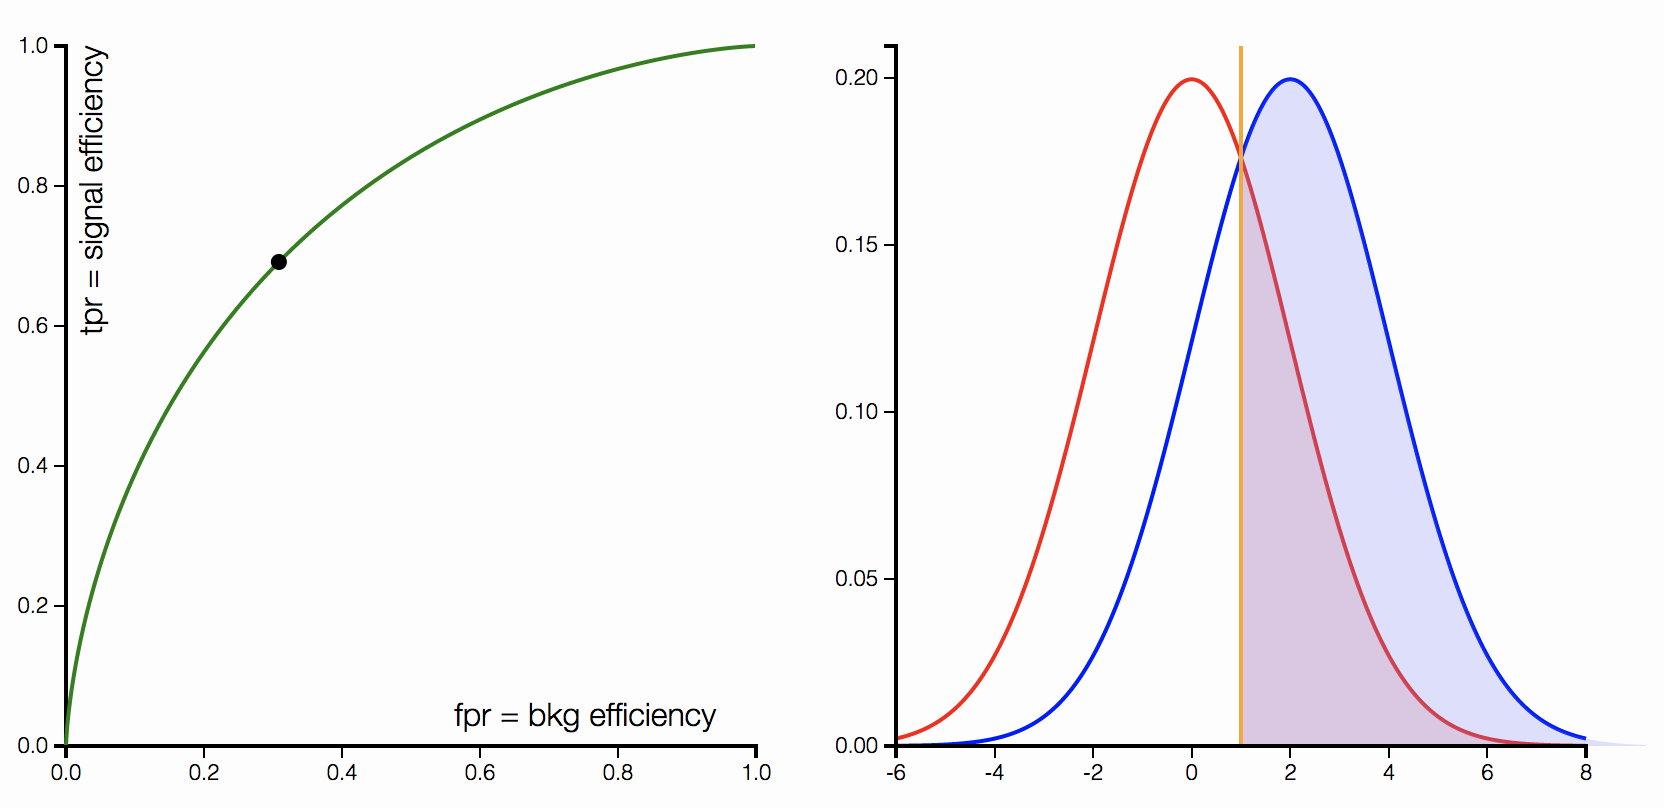

Threshold value separates the two classes.

For each choice of threshold value chosen:

- Different confusion matrix
- Different values of TP and FP rates
- Different Precision, Recall etc. metrics

A ROC curve is plot of True positive rate vs False Positive rate for different choices of the threshold value.



Plotting the ROC Curves for the two classifiers
---

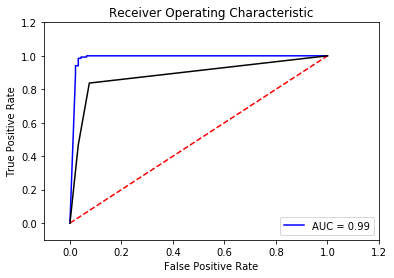

In [49]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(false_positive_rate2, true_positive_rate2, 'k',
label='AUC = %0.2f'% roc_auc2)
#plt.plot(false_positive_rate3, true_positive_rate3, 'g',
#label='AUC = %0.2f'% roc_auc2)
plt.show()

How to use ROC curves to choose a classifer?
---

Is a ROC curve with higher Area Under the Curve (AUC) always better that the other?

No. 

Consider the case of a classifier with almost equal number of positive and negative class instances.

Now you add to the data a large number of negative class instances that can be clearly predicted to be as negative class instances.

What happens to the ROC curve?

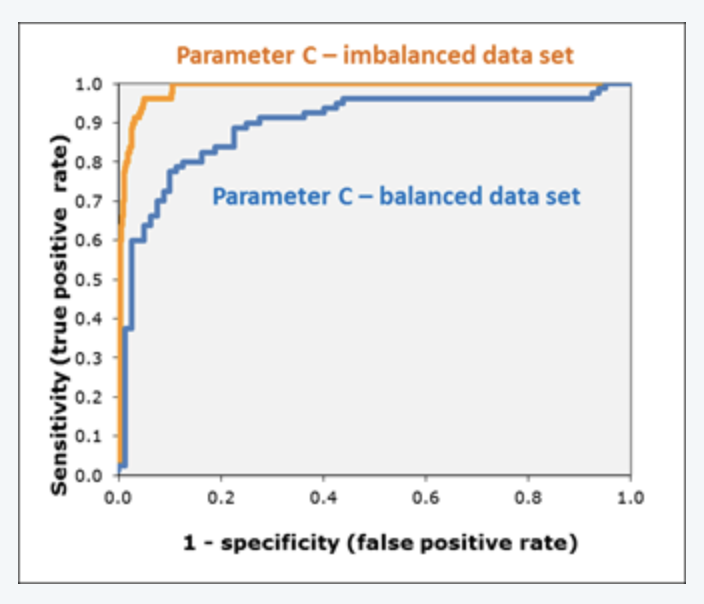

The ROC curve can be made to look much better, having a larger AUC, just by adding lots of clearly negative instances. 

So, choosing a classifier (test) based on the AUC of its ROC curve could be very deceptive.

-----------
-------

What if we have the case of intersecting ROC curves as shown below?

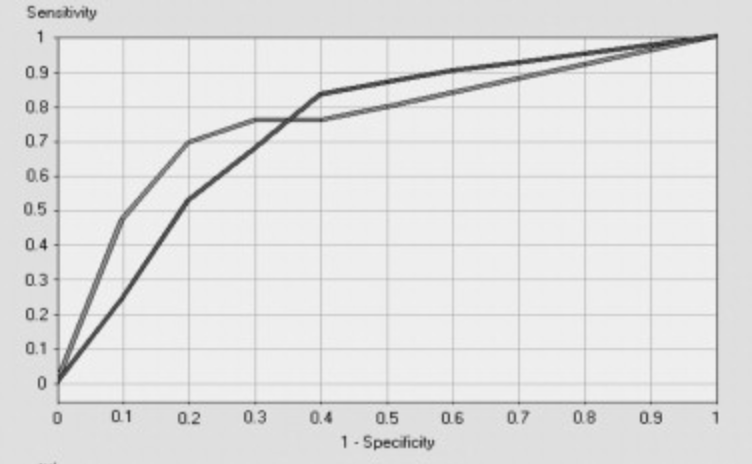

Depending on what FP rate we want to live with, we choose the classifier that gives us the higher TP rate. This could be a different classifier for different values of the acceptable FP rates.

----------------------------


------


Precision Recall Curve
-----




In [50]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, predict_probs[:,1])
precision2, recall2, thresholds2 = precision_recall_curve(y_test, dt_predict_probs[:,1])

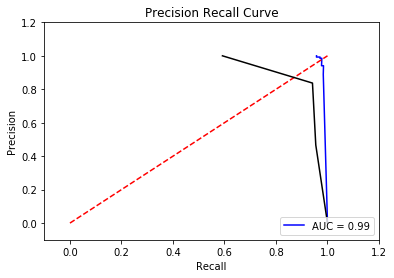

In [51]:
plt.title('Precision Recall Curve')
plt.plot(precision, recall, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.plot(precision2, recall2, 'k',
label='AUC = %0.2f'% roc_auc2)
#plt.plot(false_positive_rate3, true_positive_rate3, 'g',
#label='AUC = %0.2f'% roc_auc2)
plt.show()

In general, a precision recall curve may look like as follows:

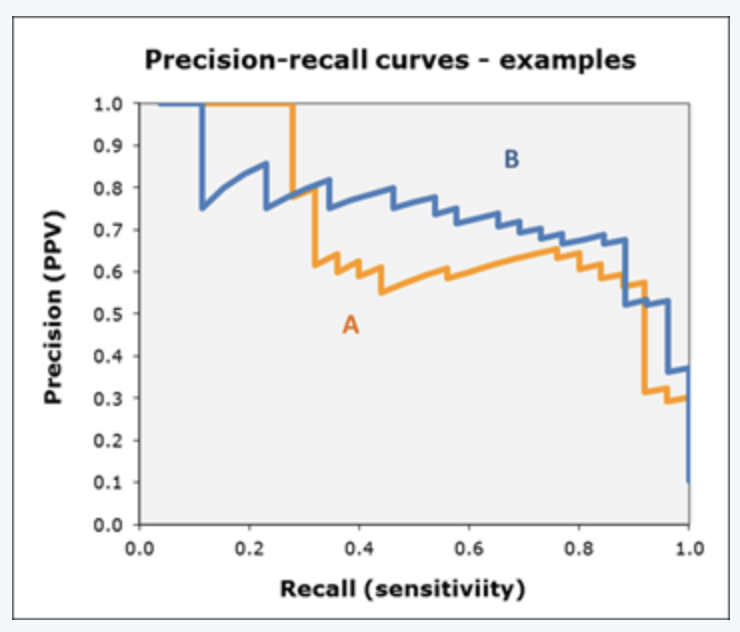

Precision-recall curves are often zigzag curves frequently going up and down. Therefore, precision-recall curves tend to cross each other much more frequently than ROC curves. This can make comparisons between curves challenging. However, curves close to the PRC for a perfect test have a better performance level than the ones closes to the baseline. In other words, a curve above the other curve has a better performance level.

Precision-Recall curve for the perfect classifier for which the two classes have no overlap.

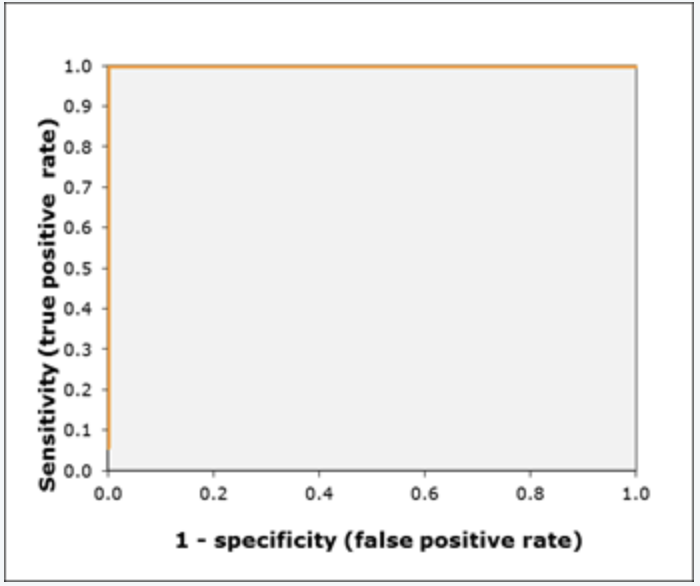

And the baseline Precision-Recall curve for a worthless classifier for which the two classes are completely overlapping.

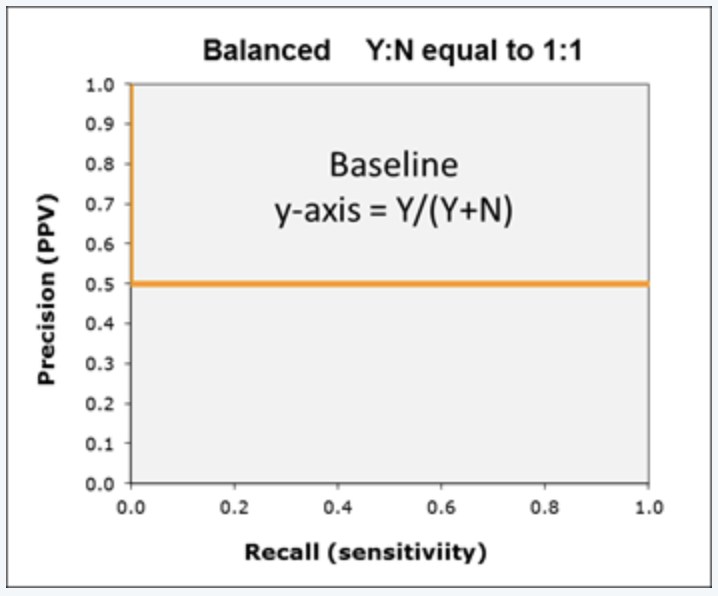

OR

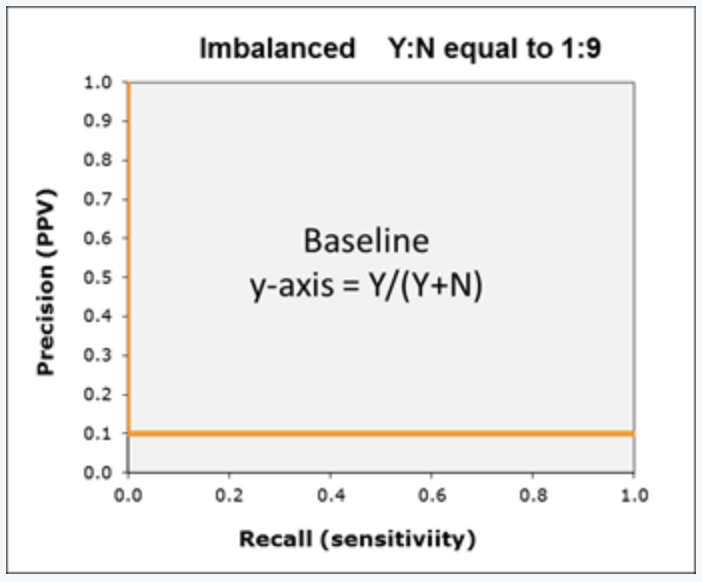




Which classifier to choose?
------

Choose the one that is closest to the ideal PR-Curve and farthest from the baseline PR-Curve.


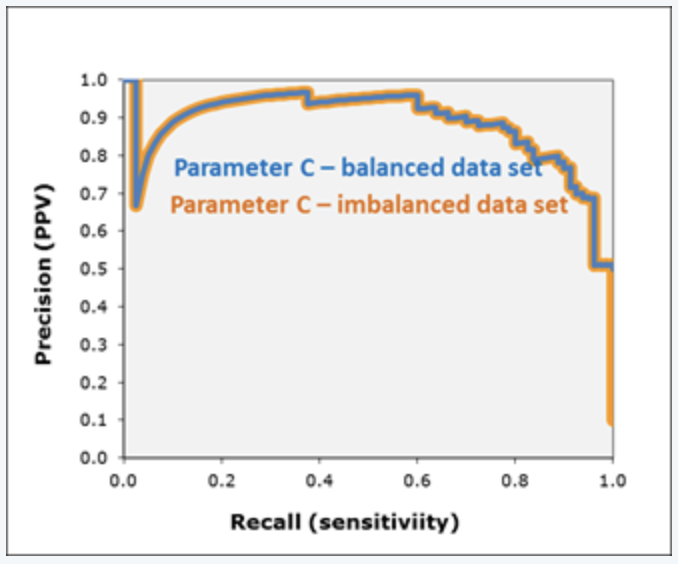

For balanced or imbal;anced classes, the PR-Curves identical.


In [52]:
actual = [1,1,1,0,0,0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]
preds = [1,1,1,1,1,0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
predictions = [0.9, 0.5, 0.85, 0.4, 0.45, 0.6, 0.47, 0.67, 0.975, 0, 1, 0, 0.67, 0.72, 0.84, 0.4, 0.32, 0.22, 0, 0.45, 0.4, 0.45, 0.55, 0.65, 0.85]
predictions2 = [0.4, 0.8, 0.35, 0.96, 0.65, 0.3, 0.47, 0.51, 0.975, 0, 0.8, 0, 0.67, 0.72, 0.84, 0.4, 0.32, 0.22, 0, 0.45, 0.95, 0.65, 0.55, 0.65, 0.85]
predictions3 = [0.9,0.9,0.9,0,0,0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]

In [53]:
from sklearn.metrics import average_precision_score
confusion_matrix(actual,preds)

array([[ 8,  3],
       [ 4, 10]])

In [54]:
average_precision_score(actual,preds)

0.7094505494505495

In [55]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(actual, predictions2)
false_positive_rate3, true_positive_rate3, thresholds3 = roc_curve(actual, predictions3)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
roc_auc3 = auc(false_positive_rate3, true_positive_rate3)

In [56]:
false_positive_rate

array([0.        , 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.18181818, 0.18181818, 0.36363636,
       0.63636364, 0.72727273, 0.72727273, 1.        ])

In [57]:
true_positive_rate

array([0.        , 0.        , 0.14285714, 0.28571429, 0.42857143,
       0.57142857, 0.64285714, 0.64285714, 0.85714286, 0.92857143,
       0.92857143, 0.92857143, 1.        , 1.        ])

In [58]:
thresholds

array([2.  , 1.  , 0.9 , 0.85, 0.72, 0.67, 0.65, 0.6 , 0.47, 0.45, 0.4 ,
       0.32, 0.22, 0.  ])

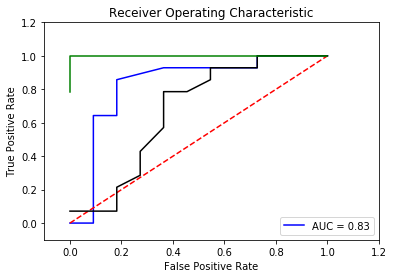

In [59]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(false_positive_rate2, true_positive_rate2, 'k',
label='AUC = %0.2f'% roc_auc2)
plt.plot(false_positive_rate3, true_positive_rate3, 'g',
label='AUC = %0.2f'% roc_auc2)
plt.show()

In [60]:
roc_auc

0.8311688311688312

In [61]:
roc_auc2

0.6688311688311688

In [62]:
roc_auc3

1.0

No handles with labels found to put in legend.


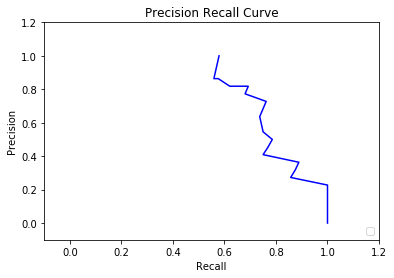

In [63]:
actual = [1,1,1,0,0,0,   1, 1, 1, 0, 0, 0,     1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,0,0, 1, 1, 1]
preds = [0.75,0.8,0.9,0.3,  0.6,0.8, 1, 0, 0.45, 0.15,   0.4, 0.9, 0.72, 0, 1, 0.8, 0.4, 0.6, 0.7, 0.25, 0, 0, 0.6, 0.98, 0.88, 0.87, 1, 1, 0.7, 0.2, 0.3, 0.4, 0.2, 0.2, 0.2, 0.45, 0.4, 0.35]

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(actual, preds)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision2, recall2, thresholds2 = precision_recall_curve(actual, preds)

plt.title('Precision Recall Curve')
plt.plot(precision2, recall2, 'b')
#label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
#plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('Precision')
plt.xlabel('Recall')
#plt.plot(precision2, recall2, 'k',
#label='AUC = %0.2f'% roc_auc2)
#plt.plot(false_positive_rate3, true_positive_rate3, 'g',
#label='AUC = %0.2f'% roc_auc2)
plt.show()



When classes are balanced we can use Acuracy and ROC curve.

When classes are not balanced then we must use Precision, Recall, and Precision Recall curve.

In-Class Exercise #2
----

Consider the Boston Housing Dataset used above for illustrating the regression examples. The mean value of the Median Value attribute (MEDV) is 22.53. Assign the label "1" to all the records that have a MEDV value equal or larger than 22.53 and assign the label "0" to the other records.

1. Choose 30% of records for testing and 70% for training.
2. Train an MLP classifier to predict the class for each neighborhood in the dataset.
3. Train a decision tree to predict the class for each neighborhood in the dataset.
4. Plot ROC curves for both classifiers and decide which classifier is better than the other.


Homework Problems:
---

1. Perform the following tasks with the Diabetes dataset used above.

    a. Generate the OLS regression model that uses all the features.
    
    b. Test the new OLS models generated by dropping one feature at a time. Select that feature to drop permanently from the model that causes the least amount of decrease in the $R^2$ value of the original model. Compute the AIC value of the resulting smaller model.
    
    c. Keep repeating the step (b) until AIC value keeps decreasing.
    
    d. When you reach a stage when dropping any feature from the model causes the AIC value to increase, STOP. This is the model for the dataset.
    
    
2. Consoder the In-Class Exercise #2 stated above. Perform the following tasks:

    a. Build a classifier when all neghborhoods with MEDV above 17.5 are marked as belonging to class "1" and the remaining neighborhoods are marked as belonging to class "0".
    
    b. Repeat step (a) above for the thresholds of 20.0, 22.5, 25.0 and 27.5.
    
    c. Use ROC curves to decide which classifier is the best one if we use AUC as the criterion.
    
    d. Use PR-Curves to decide which classifier is the best one that you will like to use.
    